In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns



In [2]:
df = pd.read_csv('USArrests.csv')
df.index = df['Unnamed: 0']
df = df.drop(columns=['Unnamed: 0'])
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
hc_complete = linkage(df, method='complete')
hc_average = linkage(df, method='average')
hc_single = linkage(df, method='single')

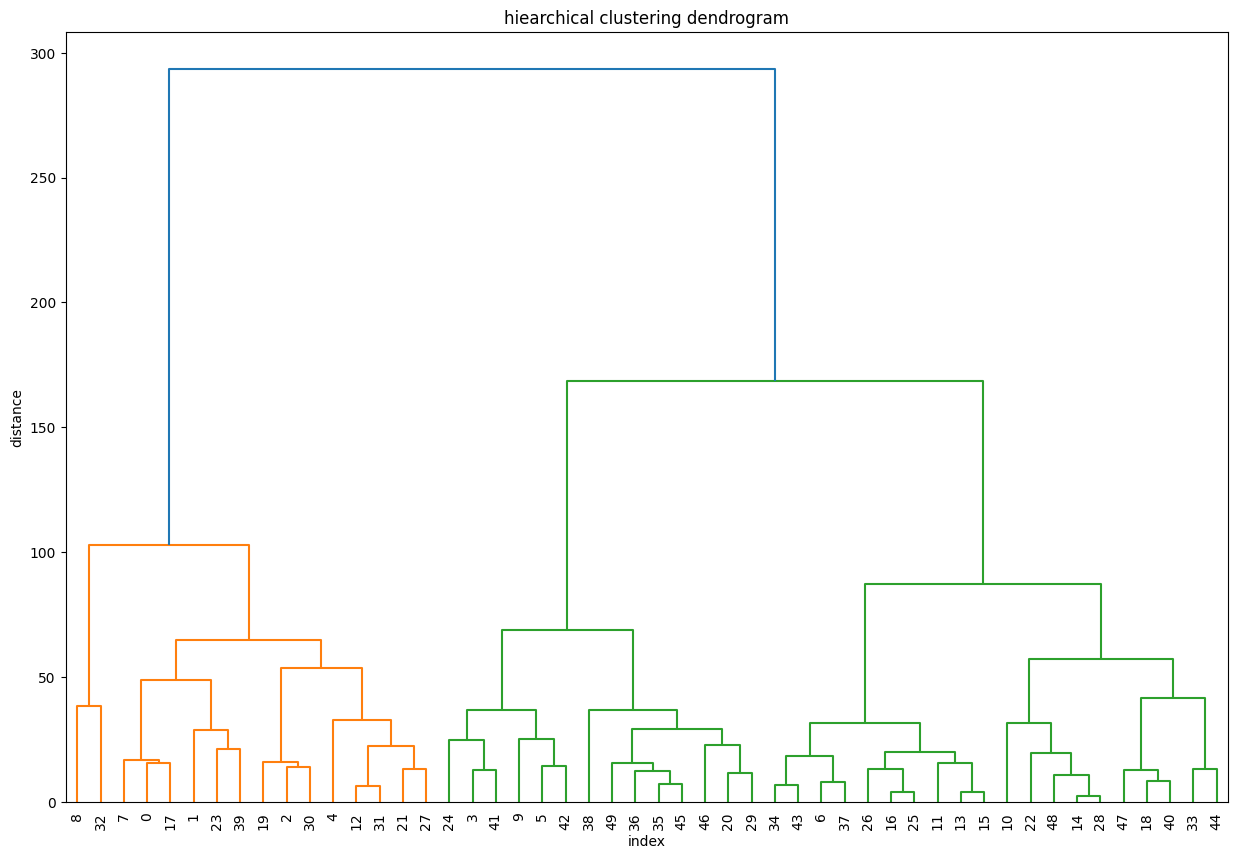

In [9]:
plt.figure(figsize=(15,10))
plt.title("hiearchical clustering dendrogram")
plt.xlabel("index")
plt.ylabel("distance")
dendrogram(hc_complete, leaf_font_size=10);

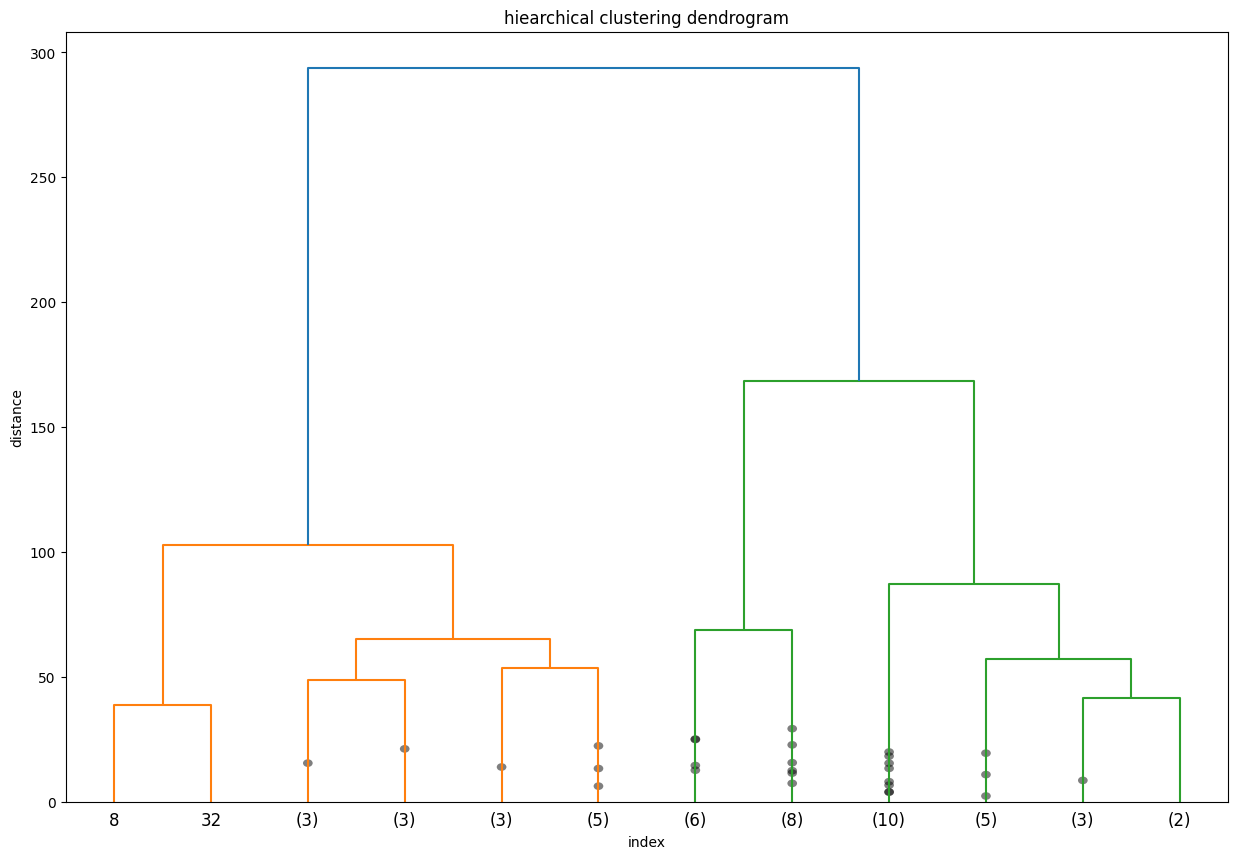

In [8]:
plt.figure(figsize=(15,10))
plt.title("hiearchical clustering dendrogram")
plt.xlabel("index")
plt.ylabel("distance")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=12,
           show_contracted=True);

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [12]:
pd.DataFrame({"state": df.index, "cluster": cluster.fit_predict(df)})[:10]

,state,cluster
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [13]:
df["cluster"] = cluster.fit_predict(df)

In [14]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
